In [70]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [35]:
columns_name = [
    'timestamp','sex','matric_gpa_%' ,'study_year','faculty','gpa_%_2023','accommodation_status',
    'monthly_allowance','scholarship','study_hours_week','socialising_week','drinks_night',
    'classes_missed','modules_failed','in_relationship','parental_approval','relationship_parents'
]

In [36]:
student_data = pd.read_csv("Stats survey.csv",names = columns_name,header = 0)

In [37]:
student_data.head()

,timestamp,sex,matric_gpa_%,study_year,faculty,gpa_%_2023,accommodation_status,monthly_allowance,scholarship,study_hours_week,socialising_week,drinks_night,classes_missed,modules_failed,in_relationship,parental_approval,relationship_parents
0,2024/03/07 5:12:01 pm EET,Female,76.0,2nd Year,Arts & Social Sciences,72.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,8+,Only weekends,8+,3,0,Yes,Yes,Very close
1,2024/03/07 5:12:08 pm EET,Male,89.0,2nd Year,Economic & Management Sciences,75.0,Private accommodation/ stay with family/friends,R 7001 - R 8000,"Yes (NSFAS, etc...)",8+,Only weekends,3-5,4+,0,No,Yes,Very close
2,2024/03/07 5:12:25 pm EET,Male,76.0,1st Year,AgriSciences,55.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,2,8+,3,0,No,Yes,Very close
3,2024/03/07 5:12:28 pm EET,Male,89.0,2nd Year,Engineering,84.0,Private accommodation/ stay with family/friends,R 6001 - R 7000,No,3-5,3,8+,2,0,Yes,Yes,Very close
4,2024/03/07 5:13:00 pm EET,Female,74.0,2nd Year,Arts & Social Sciences,52.0,Private accommodation/ stay with family/friends,R 4001- R 5000,No,3-5,Only weekends,5-8,1,3,No,Yes,Fair


In [38]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

## Exploratory Data Analysis
* Shape: Rows and Columns
* Data Types
* No. of missing values
* Categorical value count
* Visualization
* Correlation
* Outliers

In [39]:
## Lets start by finding basic information.
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   timestamp             406 non-null    object 
 1   sex                   404 non-null    object 
 2   matric_gpa_%          399 non-null    float64
 3   study_year            333 non-null    object 
 4   faculty               399 non-null    object 
 5   gpa_%_2023            320 non-null    float64
 6   accommodation_status  383 non-null    object 
 7   monthly_allowance     375 non-null    object 
 8   scholarship           398 non-null    object 
 9   study_hours_week      403 non-null    object 
 10  socialising_week      404 non-null    object 
 11  drinks_night          404 non-null    object 
 12  classes_missed        403 non-null    object 
 13  modules_failed        403 non-null    object 
 14  in_relationship       403 non-null    object 
 15  parental_approval     4

**From this, we found that there are 406 rows and 17 columns.  
Also, we found out that there are null values in many rows.  
The datatype is float.  
We also know about the columns present in the given data and identify the columns not needed to us(like the timestamp column).**

In [40]:
#Lets find out the number and percentage of males and females.
student_data["sex"].value_counts()

sex
Male      216
Female    188
Name: count, dtype: int64

In this survey of 406 students, it was found that there are 216 males and 188 females.

In [41]:
#Let's find out the percentage of males and females by normalizing the value count.
student_data["sex"].value_counts(normalize=True)

sex
Male      0.534653
Female    0.465347
Name: proportion, dtype: float64

Proportion of male and female is 0.53 to 0.46. It means there are 53.46% male students and 36.53% females.

In [42]:
# Let's analyze the relation between student's parental approval and student's relation with parents 
table = pd.crosstab(student_data.parental_approval,student_data.relationship_parents)
table

relationship_parents,Close,Distant,Fair,Very close
parental_approval,,,,
No,18,1,9,20
Yes,79,1,25,248


In [43]:
#Let's transpose to see the table more properly.
table.T 

parental_approval,No,Yes
relationship_parents,,
Close,18,79
Distant,1,1
Fair,9,25
Very close,20,248


<Axes: xlabel='relationship_parents'>

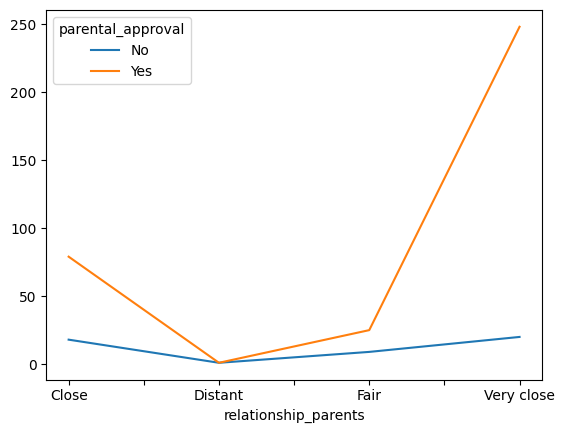

In [44]:
#Let's plot it in line and understand it better.
table.T.plot.line()

**The graph visualizes the relationship between students' parental approval and their relationship with their parents. The x-axis represents different levels of the student-parent relationship (Close, Distant, Fair, Very Close), while the y-axis shows the count of parental approval responses. The lines differentiate between "Yes" (approval) and "No" (disapproval). The "Yes" approval count is significantly higher when students have a "Very Close" relationship with their parents, while it drops sharply for "Distant" relationships. The "No" approval count remains relatively low and stable across all categories.**

In [45]:
student_data.faculty.value_counts()

faculty
Economic & Management Sciences    211
Science                            56
Arts & Social Sciences             47
Engineering                        37
AgriSciences                       22
Medicine and Health Services       10
Law                                10
Education                           6
Name: count, dtype: int64

In [54]:
# Lets find out the minimum and average marks required to study eco in the college.

In [46]:
avg_eco

0              Arts & Social Sciences
1      Economic & Management Sciences
2                        AgriSciences
3                         Engineering
4              Arts & Social Sciences
                    ...              
401                           Science
402    Economic & Management Sciences
403                               NaN
404    Economic & Management Sciences
405                               NaN
Name: faculty, Length: 406, dtype: object

In [55]:
#Let's group the whole data by faculty.
group_faculty = student_data.groupby(by="faculty")

In [56]:
#From the data grouped by faculty, let's see the matric gpa% for them and see the details.
group_faculty["matric_gpa_%"].describe()

,count,mean,std,min,25%,50%,75%,max
faculty,,,,,,,,
AgriSciences,22.0,74.772727,5.706569,66.0,70.00,75.0,77.00,86.0
Arts & Social Sciences,46.0,75.969565,5.864237,60.0,72.25,76.0,80.75,85.0
Economic & Management Sciences,210.0,76.977095,7.577566,34.0,73.00,77.0,82.00,99.0
Education,6.0,76.000000,4.857983,71.0,72.00,75.5,79.75,82.0
Engineering,36.0,83.691667,5.574399,73.0,80.00,83.0,86.00,98.0
Law,10.0,80.200000,5.473167,72.0,77.25,79.0,82.25,90.0
Medicine and Health Services,9.0,79.888889,4.456581,73.0,78.00,80.0,84.00,85.0
Science,55.0,80.294727,5.470267,65.0,76.00,80.0,84.50,92.0


In [94]:
information = student_data.groupby("faculty")["matric_gpa_%"].agg(["min", "max", "mean"])

In [95]:
information

,min,max,mean
faculty,,,
AgriSciences,66.0,86.0,74.772727
Arts & Social Sciences,60.0,85.0,75.969565
Economic & Management Sciences,34.0,99.0,76.977095
Education,71.0,82.0,76.000000
Engineering,73.0,98.0,83.691667
Law,72.0,90.0,80.200000
Medicine and Health Services,73.0,85.0,79.888889
Science,65.0,92.0,80.294727


In [66]:
table1 = pd.crosstab(student_data.accommodation_status,student_data.socialising_week)
table1

socialising_week,0,1,2,3,4+,Only weekends
accommodation_status,,,,,,
Non-private accommodation ie. Res,2,12,15,5,3,11
Private accommodation/ stay with family/friends,14,89,70,52,13,97


<Axes: xlabel='socialising_week', ylabel='accommodation_status'>

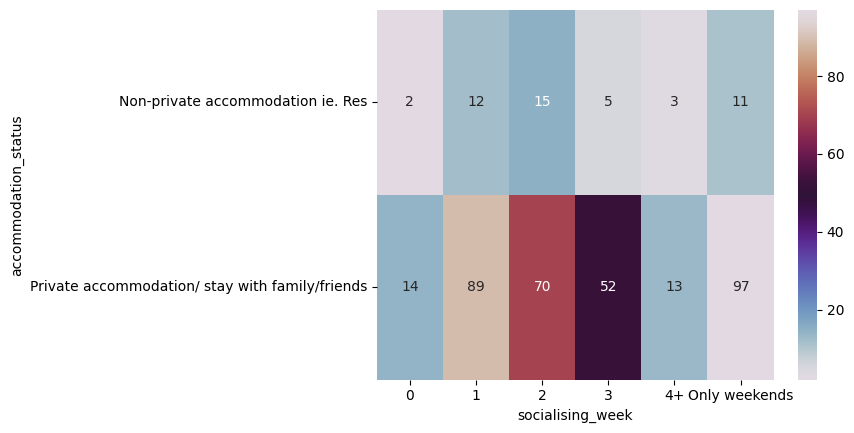

In [69]:
sns.heatmap(table1, annot = True, cmap = "twilight")

* During weekends, students starting with their friends and family are nearly **9 times more likely** to party compared to hostelers.
* In an average, privaltely housed student party 7 more 7 times than students living in college.

In [72]:
score,p_val,_,_= stats.chi2_contingency(table1)
print(score)
print(p_val)

3.9099046455825284
0.5624591514521107


In [73]:
# If P value is less than significant interval(here it is 0.05) means reject H not and H1 is true. where H is no association and H1 means there is association between the variables.

* Here P value is 0.56 ie greater than significant interval 0.05. So, there is association between the variables.

**Influence of Gender on GPA**

In [76]:
student_data.groupby("sex")['gpa_%_2023'].agg(("min","max","mean","std"))

,min,max,mean,std
sex,,,,
Female,50.0,95.22,67.596067,8.834404
Male,30.0,92.00,65.097059,9.284666


<Axes: xlabel='gpa_%_2023', ylabel='sex'>

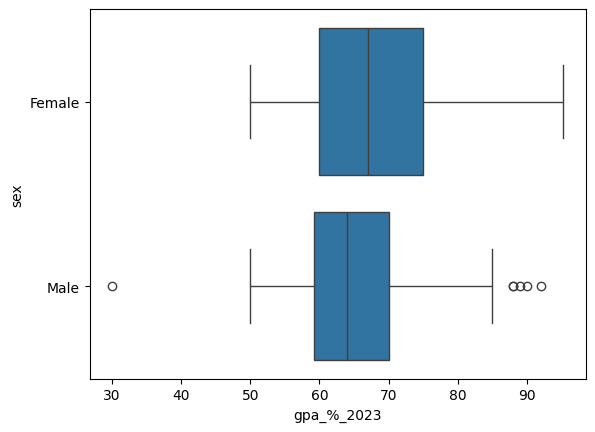

In [78]:
sns.boxplot(x = "gpa_%_2023",y = "sex", data = student_data)

**Relationship between scholarship and modules failed**

In [80]:
student_data.scholarship.value_counts()

scholarship
No                     352
Yes (NSFAS, etc...)     46
Name: count, dtype: int64

In [81]:
student_data.modules_failed.value_counts()

modules_failed
0     263
1      58
2      31
4+     27
3      24
Name: count, dtype: int64

In [96]:
table2 = pd.crosstab(student_data.scholarship,student_data.modules_failed)
table2

modules_failed,0,1,2,3,4+
scholarship,,,,,
No,230,49,29,20,23
"Yes (NSFAS, etc...)",27,9,2,4,4


<Axes: xlabel='modules_failed', ylabel='scholarship'>

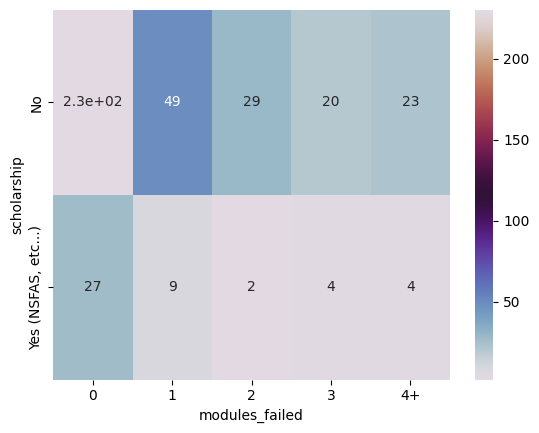

In [86]:
sns.heatmap(table2, annot = True, cmap = "twilight")

<Axes: xlabel='modules_failed'>

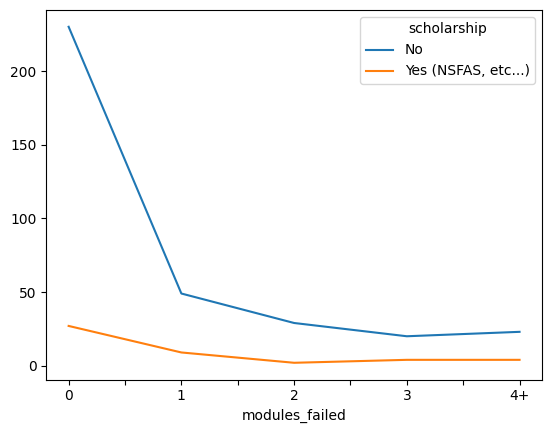

In [90]:
table2.T.plot.line()

In [97]:
score,p_val,_,_= stats.chi2_contingency(table2)
print(score)
print(p_val)

2.844930360651007
0.5841020962470809


<Axes: xlabel='matric_gpa_%', ylabel='gpa_%_2023'>

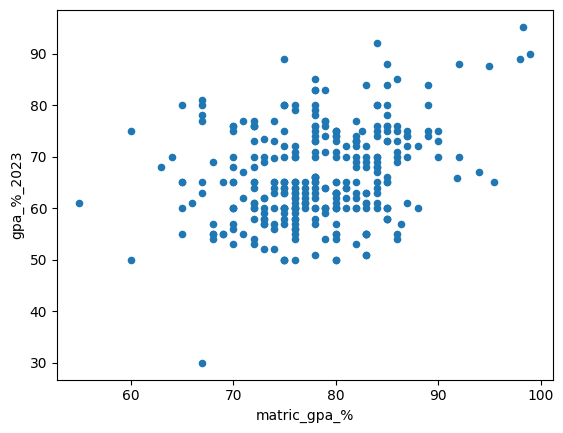

In [99]:
student_data.plot.scatter("matric_gpa_%","gpa_%_2023")

In [100]:
student_data[["matric_gpa_%","gpa_%_2023"]].corr()

,matric_gpa_%,gpa_%_2023
matric_gpa_%,1.000000,0.299104
gpa_%_2023,0.299104,1.000000


* Thus it is found that the percentage in high school and bachelor are not correlated.

In [101]:
student_data.isna().sum()

timestamp                0
sex                      2
matric_gpa_%             7
study_year              73
faculty                  7
gpa_%_2023              86
accommodation_status    23
monthly_allowance       31
scholarship              8
study_hours_week         3
socialising_week         2
drinks_night             2
classes_missed           3
modules_failed           3
in_relationship          3
parental_approval        4
relationship_parents     3
dtype: int64